In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

1) y'' + 9y = cos(t), y(π) = −5/3, y'(0) = 5

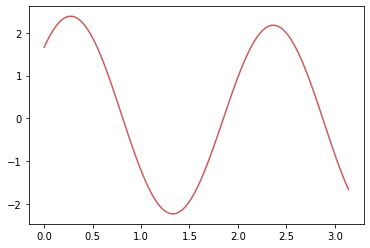

In [2]:
t = np.linspace(0, np.pi, 100)

def ode(t, Y):
    
    y, yp = Y
    ypp = -9*y + np.cos(t)
    
    return np.array([yp, ypp])

def objective(u):
    
    r = np.zeros(len(u))
    # the initial value of y(0) is not known - u[0]
    sol = solve_ivp(ode, [t[0], t[-1]], np.array([u[0], 5], dtype=object), t_eval = t)
    y, yp = sol.y
    r[0] = y[-1] + 5/3 # as y(π) + 5/3 = 0 
    
    return r


# the starting estimate for the roots o
u = 0.5
# fsolve returns the roots of f(x) = 0
u = fsolve(objective, u)

sol = solve_ivp(ode, [t[0], t[-1]], np.array([u[0], 5], dtype=object), t_eval = t)
y, yp = sol.y

plt.plot(sol.t, y, color = 'indianred')

In numerical analysis, the shooting method is a method for solving a boundary value problem by reducing it to an initial value problem.

2) y''''(x) = x, y(0) = 0, y(1) = 0, y''(0) = 0, y''(1) = 0 

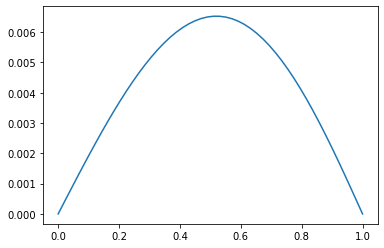

In [3]:
x = np.linspace(0, 1, 50)

def func(x, vector):
    
    y, yp, ypp, yppp = vector
    ypppp = x
    
    return [yp, ypp, yppp, ypppp]

def objective(u):
    
    r = np.zeros(len(u))
    # the initial values of y'(0) and y'''(0) are not known [y(0), y'(0), y''(0), y'''(0)]
    sol = solve_ivp(func, [x[0], x[-1]], np.array([0, u[0], 0, u[1]], dtype=object), t_eval = x)
    y, yp, ypp, yppp = sol.y
    r[0] = y[-1]-0 # y(1) - 0 = 0 
    r[1] = ypp[-1]-0 # y''(1) - 0 = 0 It would have been r[0] = y[-1]-1 for y''(1) = 1
    
    return r

u = np.array([0.0, 1.0])

u = fsolve(objective, u)

sol = solve_ivp(func, [x[0], x[-1]], np.array([0, u[0], 0, u[1]], dtype=object), t_eval = x)
y, yp, ypp, yppp = sol.y

plt.plot(x, y)